In [116]:
negatif = ['pas', 'charge', 'trop', 'peu', 'privé', 'administratif', 'administrative', 'perte', 'administratifs', 'but',
           'décharge', 'surcharge', 'covid', 'dégradé', 'perdre', 'doute', 'arrêter', 'admin', 'burn', 'cdd', 'out', 'refus',
           'empiète', 'fatigue', 'fou', 'cher', 'démotive', 'empêche', 'négatif', 'épuisant', 'adm', 'burnout', 'copinage',
           'décourageant', 'décrocher', 'frein', 'frustrant', 'handicap', 'misère', 'aucune', 'aucun', 'poids', 'sacrifier',
           'smic', 'soucis', 'souffre', 'transport', 'décourage', 'dégradée', 'forcé', 'fuite', 'guerre', 'hypocrisie',
           'insuffisant', 'négatifs', 'souci', 'tue', 'catastrophe', 'décourager', 'déplacement', 'déplacer', 'réforme', 'ni']

neutre = ['temps', 'métier', 'étudiants', 'si', 'carrière', 'chercheurs', 'nombre', 'ans', 'chercheur', 'année', 'post', 'cours',
          'activité', 'mcf', 'poste', 'doctorants', 'pouvoir', 'rapport', 'compte', 'vie', 'passé', 'trouver', 'activités', 'iut',
         'support', 'avant', 'après', 'dossier', 'compris', 'dire', 'fois', 'forte', 'important', 'choix', 'docteur', 'début', 'juste',
         'voir', 'étant', 'gérer', 'fin', 'futur', 'intérêt', 'ufr', 'doctorant', 'dossiers', 'candidats', 'arrêté', 'pédagogie', 'cnrs',
          'financier', 'aspect', 'cnu', 'suivi', 'étudiant', 'ingénieur', 'métiers', 'offre', 'ingénieurs', 'sup', 'état', 'assurer',
          'directeur', 'doctorat', 'recruter', 'supérieur', 'société', 'prof', 'avis', 'effectif', 'effectifs', 'statut', 'candidat',
          'chef', 'santé', 'structure', 'thésards', 'tâche', 'impact', 'iuf', 'ministère', 'perspective', 'stage', 'stratégie', 'sit',
          'starynkevitch', 'refpersys']

positif = ['recherche', 'sur', 'sans', 'ripec', 'docteurs', 'attirant', 'étranger', 'anr', 'hdr', 'attractif', 'attractivité',
           'ripec3', 'inria', 'cadre', 'ins2i', 'motivés', 'avantage', ' apprécie', 'attirer', 'attractifs', 'gratifiant', 'motivant',
           'réussi', 'succès', 'suffisant', 'bénéficier', 'cdi', 'positifs', 'ras', 'réussir', 'réussite', 'rêve', 'bénéficie',
           'motivé', 'mérite', 'positif', 'rechercher']

In [117]:
total = negatif + neutre + positif

In [118]:
import pandas as pd

enseignement = pd.read_csv("enseignement_final.csv").dropna()
merci = pd.read_csv("merci_final.csv").dropna()
personnelle = pd.read_csv("personnelle_final.csv").dropna()
recherche = pd.read_csv("recherche_final.csv").dropna()
totalite = pd.read_csv("totalite_final.csv").dropna()

In [119]:
enseignement.drop(columns=['SID'], inplace=True)
merci.drop(columns=['SID'], inplace=True)
personnelle.drop(columns=['SID'], inplace=True)
recherche.drop(columns=['SID'], inplace=True)
totalite.drop(columns=['SID'], inplace=True)
totalite.head()

,Totalite des commentaires,Note totalite
0,il n y a plus d ufr à l université de bordeaux...,1
1,les conditions de travail dépendent beaucoup d...,1
2,l enseignement est de plus en plus difficile j...,1
3,je suis dans une équipe inria cela offre des c...,0
4,aujourd hui l informatique offre une multitude...,0


In [120]:
enseignement.rename(columns={enseignement.columns[0]: "texte", enseignement.columns[1]: "note"}, inplace=True)
merci.rename(columns={merci.columns[0]: "texte", merci.columns[1]: "note"}, inplace=True)
personnelle.rename(columns={personnelle.columns[0]: "texte", personnelle.columns[1]: "note"}, inplace=True)
recherche.rename(columns={recherche.columns[0]: "texte", recherche.columns[1]: "note"}, inplace=True)
totalite.rename(columns={totalite.columns[0]: "texte", totalite.columns[1]: "note"}, inplace=True)
totalite.head()

,texte,note
0,il n y a plus d ufr à l université de bordeaux...,1
1,les conditions de travail dépendent beaucoup d...,1
2,l enseignement est de plus en plus difficile j...,1
3,je suis dans une équipe inria cela offre des c...,0
4,aujourd hui l informatique offre une multitude...,0


In [121]:
dfs = [enseignement, merci, personnelle, recherche, totalite]
merged_df = pd.concat(dfs, ignore_index=True)
print(merged_df.head())
merged_df.shape

                                               texte  note
0  l enseignement est de plus en plus difficile j...     0
1  a ma connaissance mon enseignement n est pas é...     1
2  attention pour être reconnu l investissement p...     1
3  dernière question s il y a et non pas s il n y...     1
4  quand un jeune me demande si devenir prof de f...     0


(1241, 2)

In [122]:
occurrences_notes = merged_df['note'].value_counts()
print(occurrences_notes)

1    634
0    607
Name: note, dtype: int64


In [123]:
df_0 = merged_df[merged_df['note'] == 0]
df_1 = merged_df[merged_df['note'] == 1]
df_1_balanced = df_1.sample(n=len(df_0), random_state=42)
balanced_df = pd.concat([df_0, df_1_balanced], ignore_index=True)
print(balanced_df['note'].value_counts())

0    607
1    607
Name: note, dtype: int64


In [124]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
# Téléchargez les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
!pip install unidecode


In [127]:
import pandas as pd
import string
from unidecode import unidecode
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
stopwords_fr = stopwords.words('french')
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional

from keras.layers import Dense
from keras import regularizers

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

# Créer un dictionnaire français à partir des mots français contenus dans la liste des mots français du corpus nltk
fr_dict = set(stopwords.words('french'))

from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [128]:
def clean_text(text):
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub(r'[@/#]', '', text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = re.sub(r'_+', '', text)
    text = unidecode(text)
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


balanced_df['texte']= balanced_df['texte'].apply(clean_text)
balanced_df['texte'] = balanced_df['texte'].apply(remove_emoji)
balanced_df.head()

,texte,note
0,l enseignement est de plus en plus difficile j...,0
1,quand un jeune me demande si devenir prof de f...,0
2,ce n est pa qu un probleme de nb d heures mais...,0
3,la reforme du but a ete absurde et chaotique d...,0
4,je suis en delegation cnrs pour fonctions inst...,0


In [129]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(balanced_df['texte'])
X = tokenizer.texts_to_sequences(balanced_df['texte'])
X = pad_sequences(X)
y = np.array(balanced_df['note'])
X = np.reshape(X, (X.shape[0],X.shape[1],1))
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
texts = balanced_df['texte'].tolist()
vocab_size = 1000
embedding_dim = 100
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(balanced_df['note'])

In [135]:
inputs_bi = Input(shape=(max_len,))
embedding_layer_bi = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(inputs_bi)

x_bi = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer_bi)
x_bi = Dropout(0.2)(x_bi)
x_bi = Bidirectional(LSTM(64))(x_bi)
x_bi = Dropout(0.2)(x_bi)
outputs_bi = Dense(1, activation='sigmoid')(x_bi)

modele = Model(inputs=inputs_bi, outputs=outputs_bi)

modele.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 100, 100)          100000    
                                                                 
 bidirectional_12 (Bidirect  (None, 100, 256)          234496    
 ional)                                                          
                                                                 
 dropout_12 (Dropout)        (None, 100, 256)          0         
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_13 (Dropout)        (None, 128)               0   

Epoch 1/15
28/28 [==============================] - 28s 640ms/step - loss: 0.6893 - accuracy: 0.5441 - val_loss: 0.7925 - val_accuracy: 0.4694
Epoch 2/15
28/28 [==============================] - 15s 537ms/step - loss: 0.6226 - accuracy: 0.6770 - val_loss: 0.6814 - val_accuracy: 0.6735
Epoch 3/15
28/28 [==============================] - 15s 539ms/step - loss: 0.3883 - accuracy: 0.8442 - val_loss: 0.6353 - val_accuracy: 0.7041
Epoch 4/15
28/28 [==============================] - 15s 547ms/step - loss: 0.2517 - accuracy: 0.9084 - val_loss: 0.6555 - val_accuracy: 0.7551
Epoch 5/15
28/28 [==============================] - 16s 570ms/step - loss: 0.1973 - accuracy: 0.9427 - val_loss: 0.6309 - val_accuracy: 0.7959
Epoch 6/15
28/28 [==============================] - 16s 539ms/step - loss: 0.1394 - accuracy: 0.9588 - val_loss: 0.7658 - val_accuracy: 0.7551
Epoch 7/15
28/28 [==============================] - 15s 530ms/step - loss: 0.1301 - accuracy: 0.9633 - val_loss: 0.6855 - val_accuracy: 0.7857

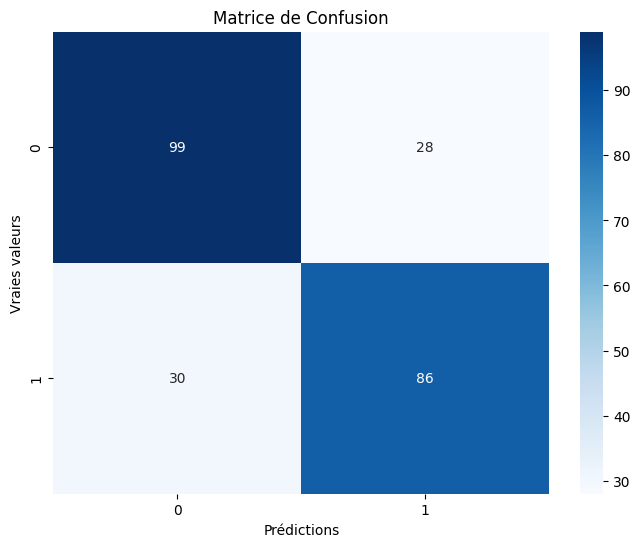

In [136]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

modele.compile(loss='binary_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bi = modele.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

loss_bi, accuracy_bi = modele.evaluate(X_test, y_test)
print("Test Loss :", loss_bi)
print("Test Accuracy :", accuracy_bi)

y_pred = modele.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()